<a href="https://colab.research.google.com/github/soulayman-al-abdallah/Data-Science-Projects/blob/main/Capstone_Emotions_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mission: Creating a machine learning model that classifies the emotion of a voice segment**

- Data download
- Data Preparation
- Audio decomposition code into sub-audios
- Data preprocessing
- Feature Engineering
- Model design ( 4 useless models, the 5th is the used one)
- Model testing
- Deploying needs

# Datasets Description

**SAVEE dataset classes:**


'a' = 'anger'

'd' = 'disgust'

'f' = 'fear'

'h' = 'happiness'

'n' = 'neutral'

'sa' = 'sadness'

'su' = 'surprise'

male_neutral     120
male_surprise     60
male_sad          60
male_disgust      60
male_happy        60
male_fear         60
male_angry        60


= 480


**RAVDESS dataset classes:**

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

**This means the meta data for the audio file is:**

Video-only (02)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12) - Female (as the actor ID number is even)

female_neutral     144
male_neutral       144
male_sad            96
male_happy          96
male_fear           96
female_happy        96
female_angry        96
female_fear         96
female_disgust      96
male_disgust        96
male_angry          96
female_surprise     96
male_surprise       96
female_sad          96

=1632

**TESS dataset classes**

young female and an older female.


'OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad'

 female_neutral     400
female_surprise    400
female_happy       400
female_angry       400
female_fear        400
female_disgust     400
female_sad         400

=2800

**CREMA-D dataset**

male_angry        671
male_happy        671
male_fear         671
male_sad          671
male_disgust      671
female_angry      600
female_fear       600
female_disgust    600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512

=7442

--------------------------------------------------

**Concatinating all data:**


female_angry       1096

female_fear        1096

female_disgust     1096

female_happy       1096

female_sad         1096

female_neutral     1056

female_surprise     496

male_neutral        839

male_happy          827

male_fear           827

male_sad            827

male_angry          827

male_disgust        827

male_surprise       156

In [ ]:
import shutil
shutil.rmtree('/content/New_surprize')

Get from kaggle.com a kaggle.json file to be able to load datasets from there to this colab directly, and then upload it to the "Files" section of this colab

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets list

# Clone DataSets

## Cloning CREMA

In [ ]:
!kaggle datasets download -d ejlok1/cremad

100% 451M/451M [00:08<00:00, 108MB/s] 
100% 451M/451M [00:08<00:00, 57.4MB/s]


In [ ]:
! unzip cremad.zip -d crema

## CLonning Kaggle ravdess

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-song-audio

 99% 450M/456M [00:04<00:00, 109MB/s] 
100% 456M/456M [00:04<00:00, 106MB/s]


In [ ]:
! unzip ravdess-emotional-song-audio.zip -d ravdess-emotional

## Clonning SAVEE

In [ ]:
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

 98% 105M/107M [00:02<00:00, 51.4MB/s] 
100% 107M/107M [00:02<00:00, 53.9MB/s]


In [ ]:
! unzip surrey-audiovisual-expressed-emotion-savee.zip -d surrey-audiovisual

## Clonning Kaggle toronto

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess/OAF_S --force

100% 427M/428M [00:04<00:00, 129MB/s]
100% 428M/428M [00:04<00:00, 106MB/s]


In [ ]:
!  unzip toronto-emotional-speech-set-tess.zip -d toronto

# Data Preprocessing

In [ ]:
# Import libraries 


import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
os.listdir('/content/toronto')

['TESS Toronto emotional speech set data',
 'tess toronto emotional speech set data']

## Reshaping Ravdes Directory only

In [ ]:
import shutil
import os
ravades = '/content/ravdess-emotional'
if 'ALL' not in os.listdir(ravades):
    os.mkdir(ravades+'/'+'ALL')
for actor in os.listdir(ravades):
  if actor!='ALL' and actor != '.ipynb_checkpoints' and actor != 'audio_song_actors_01-24':

    file_source = '/content/ravdess-emotional/'+actor+'/'
    file_destination = '/content/ravdess-emotional/ALL'
    
    get_files = os.listdir(file_source)
    for g in get_files:
      shutil.move(file_source + g, file_destination)

In [ ]:
import shutil
for actor in os.listdir(ravades):
  if actor != "ALL":
    shutil.rmtree(ravades+'/'+actor)

## Renaming wav files only in df

In [ ]:
TESS = "/content/toronto/TESS Toronto emotional speech set data/"
RAV = "/content/ravdess-emotional/ALL/"
SAVEE = "/content/surrey-audiovisual/ALL/"
CREMA = "/content/crema/AudioWAV/"

# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_su12.wav', 'JE_n14.wav', 'JE_sa08.wav', 'DC_su04.wav', 'DC_n27.wav']

In [ ]:
#SAVEE


# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

neutral     120
surprise     60
sad          60
happy        60
fear         60
disgust      60
angry        60
Name: labels, dtype: int64

In [ ]:
#RAVEE

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for audio in dir_list:
    part = audio.split('.')[0].split('-')
    emotion.append(int(part[2]))
    path.append(RAV + audio)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})

RAV_df.columns = ['emotion']
RAV_df['labels'] = RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)

RAV_df.labels.value_counts()

neutral    276
happy      184
sad        184
angry      184
fear       184
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
#TESS

path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Name: labels, dtype: int64

In [ ]:
#CREMA

dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [ ]:
emotion = []
path = []

for i in dir_list: 
    part = i.split('_')
    if part[2] == 'SAD':
        emotion.append('sad')
    elif part[2] == 'ANG':
        emotion.append('angry')
    elif part[2] == 'DIS':
        emotion.append('disgust')
    elif part[2] == 'FEA':
        emotion.append('fear')
    elif part[2] == 'HAP':
        emotion.append('happy')
    elif part[2] == 'NEU':
        emotion.append('neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: labels, dtype: int64

In [ ]:
#Concatinating all dataframes before Augmentation

df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], ignore_index = True, axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

sad         1915
happy       1915
fear        1915
angry       1915
neutral     1883
disgust     1731
surprise     460
Name: labels, dtype: int64


In [ ]:
df.tail()

,labels,source,path,emotion
11729,disgust,CREMA,/content/crema/AudioWAV/1091_WSI_DIS_XX.wav,NaN
11730,fear,CREMA,/content/crema/AudioWAV/1091_WSI_FEA_XX.wav,NaN
11731,happy,CREMA,/content/crema/AudioWAV/1091_WSI_HAP_XX.wav,NaN
11732,neutral,CREMA,/content/crema/AudioWAV/1091_WSI_NEU_XX.wav,NaN
11733,sad,CREMA,/content/crema/AudioWAV/1091_WSI_SAD_XX.wav,NaN


## Data Augmentation

**We need to oversample some classes since we have imbalanced data. ⌛**

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd

In [ ]:
#cleaning the dataframe before adding the features
df = df.drop('emotion', axis=1)

In [ ]:
df.head()

,labels,source,path
0,surprise,SAVEE,/content/surrey-audiovisual/ALL/DC_su12.wav
1,neutral,SAVEE,/content/surrey-audiovisual/ALL/JE_n14.wav
2,sad,SAVEE,/content/surrey-audiovisual/ALL/JE_sa08.wav
3,surprise,SAVEE,/content/surrey-audiovisual/ALL/DC_su04.wav
4,neutral,SAVEE,/content/surrey-audiovisual/ALL/DC_n27.wav


In [ ]:
#########################
# Augmentation methods
#########################
import soundfile as sf
def noise(data_path,row_index,targeted_label):
    """
    Adding White Noise.
    """

    data,sr = librosa.load(data_path)
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])

    data_path = data_path.split('/')[-1]
    audio_name = data_path.split('.wav')[0]

    try:
      os.mkdir(f'/content/New_{targeted_label}')
    except:
      print()
      
    data_new_path = sf.write(f'/content/New_{targeted_label}/{audio_name}_noise_{row_index}.wav', data, sr)
    
    data_new_name = f'/content/New_{targeted_label}/{audio_name}_noise_{row_index}.wav'

    return data_new_name
    
def shift(data_path,row_index,targeted_label):
    """
    Random Shifting.
    """
    data,sr = librosa.load(data_path)
    
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    audio = np.roll(data, s_range)

    data_path = data_path.split('/')[-1]
    audio_name = data_path.split('.wav')[0]

    try:
      os.mkdir(f'/content/New_{targeted_label}')
    except:
      print()
      
    data_new_path = sf.write(f'/content/New_{targeted_label}/{audio_name}_shift_{row_index}.wav', data, sr)
    
    data_new_name = f'/content/New_{targeted_label}/{audio_name}_shift_{row_index}.wav'

    return data_new_name
    
def stretch(data_path, row_index, targeted_label,rate=0.8):
    """
    Streching the Sound. Note that this expands the dataset slightly
    """
    data,sr = librosa.load(data_path)
    data = librosa.effects.time_stretch(data, rate)

    data_path = data_path.split('/')[-1]
    audio_name = data_path.split('.wav')[0]

    try:
      os.mkdir(f'/content/New_{targeted_label}')
    except:
      print()
      
    data_new_path = sf.write(f'/content/New_{targeted_label}/{audio_name}_stretch_{row_index}.wav', data, sr)

    data_new_name = f'/content/New_{targeted_label}/{audio_name}_stretch_{row_index}.wav'

    return data_new_name
    
def pitch(data_path, row_index,targeted_label):
    """
    Pitch Tuning.
    """
    data,sr = librosa.load(data_path)

    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sr, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)

    data_path = data_path.split('/')[-1]
    audio_name = data_path.split('.wav')[0]
    
    try:
      os.mkdir(f'/content/New_{targeted_label}')
    except:
      print()
      
    data_new_path = sf.write(f'/content/New_{targeted_label}/{audio_name}_pitch_{row_index}.wav', data, sr)

    data_new_name = f'/content/New_{targeted_label}/{audio_name}_pitch_{row_index}.wav'

    return data_new_name
    
def dyn_change(data_path,row_index, targeted_label):
    """
    Random Value Change.
    """
    data,sr = librosa.load(data_path)

    dyn_change = np.random.uniform(low=-0.5 ,high=7)  # default low = 1.5, high = 3
    data = (data * dyn_change)


    data_path = data_path.split('/')[-1]
    audio_name = data_path.split('.wav')[0]
    
    try:
      os.mkdir(f'/content/New_{targeted_label}')
    except:
      print()
      
    data_new_path = sf.write(f'/content/New_{targeted_label}/{audio_name}_dyn_change_{row_index}.wav', data, sr)
    
    data_new_name = f'/content/New_{targeted_label}/{audio_name}_dyn_change_{row_index}.wav'

    return data_new_name
    
def speedNpitch(data_path,row_index,targeted_label):
    """
    peed and Pitch Tuning.
    """
    data,sr = librosa.load(data_path)

    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]

    data_path = data_path.split('/')[-1]
    audio_name = data_path.split('.wav')[0]
    
    try:
      os.mkdir(f'/content/New_{targeted_label}')
    except:
      print()
      
    data_new_path = sf.write(f'/content/New_{targeted_label}/{audio_name}_speedNpitch_{row_index}.wav', data, sr)

    data_new_name = f'/content/New_{targeted_label}/{audio_name}_speedNpitch_{row_index}.wav'

    return data_new_name

In [ ]:
df_sur = df[(df['labels']=='surprise')]

In [ ]:
df_sur.head()

,labels,source,path
0,surprise,SAVEE,/content/surrey-audiovisual/ALL/DC_su12.wav
3,surprise,SAVEE,/content/surrey-audiovisual/ALL/DC_su04.wav
7,surprise,SAVEE,/content/surrey-audiovisual/ALL/JK_su08.wav
16,surprise,SAVEE,/content/surrey-audiovisual/ALL/JK_su11.wav
19,surprise,SAVEE,/content/surrey-audiovisual/ALL/JE_su12.wav


In [ ]:
df_sur.shape

(460, 3)

In [ ]:
modpath = []
for index,audio_path in enumerate(df_sur['path']): 
  modpath.append(shift(data_path = audio_path,row_index = index,targeted_label = 'surprize'))

In [ ]:
for index,audio_path in enumerate(df_sur['path']): 
  modpath.append(stretch(data_path = audio_path, row_index = index, targeted_label = 'surprize',rate=0.8))

In [ ]:
for index,audio_path in enumerate(df_sur['path']): 
  modpath.append(pitch(data_path = audio_path, row_index = index,targeted_label = 'surprize'))

In [ ]:
len(os.listdir('/content/New_surprize'))

1380

In [ ]:
modpath

In [ ]:
sur_label = ['surprise' for i in modpath]
source = ['created' for i in modpath]

dict = {'labels': sur_label, 'source': source, 'path': modpath} 
    
sur_df_new = pd.DataFrame(dict)

In [ ]:
sur_df_new.head()

,labels,source,path
0,surprise,created,/content/New_surprize/DC_su12_shift_0.wav
1,surprise,created,/content/New_surprize/DC_su04_shift_1.wav
2,surprise,created,/content/New_surprize/JK_su08_shift_2.wav
3,surprise,created,/content/New_surprize/JK_su11_shift_3.wav
4,surprise,created,/content/New_surprize/JE_su12_shift_4.wav


In [ ]:
df = pd.concat([df, sur_df_new], ignore_index = True, axis = 0)
print(df.labels.value_counts())

sad         1915
happy       1915
fear        1915
angry       1915
neutral     1883
surprise    1840
disgust     1731
Name: labels, dtype: int64


In [ ]:
df.head()

,labels,source,path
0,surprise,SAVEE,/content/surrey-audiovisual/ALL/DC_su12.wav
1,neutral,SAVEE,/content/surrey-audiovisual/ALL/JE_n14.wav
2,sad,SAVEE,/content/surrey-audiovisual/ALL/JE_sa08.wav
3,surprise,SAVEE,/content/surrey-audiovisual/ALL/DC_su04.wav
4,neutral,SAVEE,/content/surrey-audiovisual/ALL/DC_n27.wav


In [ ]:
df.tail()

,labels,source,path
13109,surprise,created,/content/New_surprize/YAF_pick_ps_pitch_455.wav
13110,surprise,created,/content/New_surprize/YAF_king_ps_pitch_456.wav
13111,surprise,created,/content/New_surprize/YAF_lose_ps_pitch_457.wav
13112,surprise,created,/content/New_surprize/YAF_road_ps_pitch_458.wav
13113,surprise,created,/content/New_surprize/YAF_merge_ps_pitch_459.wav


In [ ]:
df.to_csv('DF of all.csv')

You can skip the 4 useless modeling parts, which represent different trials of the modeling, but reached unsatisfying results in terms of accuracy. We solved the issue by simply increasing the training dataset. ✅




# --Useless 1st Modeling

### Model Design

In [ ]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_codded, test_size=0.15
                                                    , shuffle=True
                                                    , random_state=42)

In [ ]:
X_train.shape,X_test.shape

((11146, 23, 1), (1968, 23, 1))

In [ ]:
# New model
model = Sequential()
model.add(Conv1D(128, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) # Target class number
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           1152      
                                                                 
 activation (Activation)     (None, 23, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 128)           131200    
                                                                 
 batch_normalization (BatchN  (None, 23, 128)          512       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 23, 128)           0         
                                                                 
 dropout (Dropout)           (None, 23, 128)           0         
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='ADAM',metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 88/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6938 - accuracy: 0.7256 - val_loss: 0.9533 - val_accuracy: 0.6367

Epoch 89/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6970 - accuracy: 0.7238 - val_loss: 0.8995 - val_accuracy: 0.6489

Epoch 90/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6888 - accuracy: 0.7282 - val_loss: 0.9102 - val_accuracy: 0.6433

Epoch 91/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6956 - accuracy: 0.7283 - val_loss: 0.9372 - val_accuracy: 0.6392

Epoch 92/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6944 - accuracy: 0.7221 - val_loss: 0.8704 - val_accuracy: 0.6535

Epoch 93/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6874 - accuracy: 0.7299 - val_loss: 0.8781 - val_accuracy: 0.6479

Epoch 94/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6906 - accuracy: 0.7321 - val_loss: 0.9305 - val_accuracy: 0.6367

Epoch 95/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6843 - accuracy: 0.7299 - val_loss: 0.8903 - val_accuracy: 0.6453

Epoch 96/100
697/697 [==============================] - 15s 21ms/step - loss: 0.6853 - accuracy: 0.7264 - val_loss: 0.8968 - val_accuracy: 0.6519

Epoch 97/100
697/697 [==============================] - 14s 21ms/step - loss: 0.6909 - accuracy: 0.7295 - val_loss: 0.9149 - val_accuracy: 0.6341

Epoch 98/100
697/697 [==============================] - 14s 21ms/step - loss: 0.6796 - accuracy: 0.7294 - val_loss: 0.8928 - val_accuracy: 0.6448

Epoch 99/100
697/697 [==============================] - 14s 21ms/step - loss: 0.6739 - accuracy: 0.7356 - val_loss: 0.9808 - val_accuracy: 0.6250

Epoch 100/100
697/697 [==============================] - 14s 21ms/step - loss: 0.6796 - accuracy: 0.7319 - val_loss: 0.9196 - val_accuracy: 0.6428

## Prediction & Confusion Matrix

In [ ]:
y_pred = model.predict(X_test)

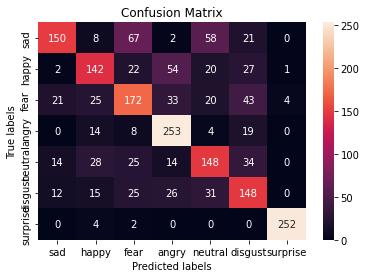

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ['sad','happy','fear','angry','neutral','disgust','surprise']
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


**-----------------------------------------------------------------------------------------------------------------------------------------------------------**

# --Useless 2nd Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_codded, test_size=0.15
                                                    , shuffle=True
                                                    , random_state=42)

In [ ]:
model = Sequential()
model.add(Conv1D(128, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) # Target class number
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 23, 128)           1152      
                                                                 
 activation_10 (Activation)  (None, 23, 128)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 23, 128)           131200    
                                                                 
 batch_normalization_4 (Batc  (None, 23, 128)          512       
 hNormalization)                                                 
                                                                 
 activation_11 (Activation)  (None, 23, 128)           0         
                                                                 
 dropout_4 (Dropout)         (None, 23, 128)           0         
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='ADAM',metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 84/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7385 - accuracy: 0.7093 - val_loss: 0.9104 - val_accuracy: 0.6336

Epoch 85/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7313 - accuracy: 0.7134 - val_loss: 0.9111 - val_accuracy: 0.6484

Epoch 86/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7358 - accuracy: 0.7107 - val_loss: 0.8885 - val_accuracy: 0.6570

Epoch 87/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7223 - accuracy: 0.7135 - val_loss: 0.8921 - val_accuracy: 0.6509

Epoch 88/100
697/697 [==============================] - 15s 22ms/step - loss: 0.7219 - accuracy: 0.7187 - val_loss: 0.9010 - val_accuracy: 0.6489

Epoch 89/100
697/697 [==============================] - 15s 22ms/step - loss: 0.7287 - accuracy: 0.7096 - val_loss: 0.8891 - val_accuracy: 0.6468

Epoch 90/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7232 - accuracy: 0.7066 - val_loss: 0.8967 - val_accuracy: 0.6479

Epoch 91/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7223 - accuracy: 0.7132 - val_loss: 0.8794 - val_accuracy: 0.6514

Epoch 92/100
697/697 [==============================] - 15s 22ms/step - loss: 0.7193 - accuracy: 0.7151 - val_loss: 0.8893 - val_accuracy: 0.6555

Epoch 93/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7171 - accuracy: 0.7199 - val_loss: 0.8871 - val_accuracy: 0.6494

Epoch 94/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7183 - accuracy: 0.7145 - val_loss: 0.9185 - val_accuracy: 0.6448

Epoch 95/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7155 - accuracy: 0.7166 - val_loss: 0.9496 - val_accuracy: 0.6316

Epoch 96/100
697/697 [==============================] - 14s 21ms/step - loss: 0.7133 - accuracy: 0.7168 - val_loss: 0.8829 - val_accuracy: 0.6519

Epoch 97/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7079 - accuracy: 0.7227 - val_loss: 0.8954 - val_accuracy: 0.6611

Epoch 98/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7163 - accuracy: 0.7133 - val_loss: 0.9547 - val_accuracy: 0.6509

Epoch 99/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7129 - accuracy: 0.7165 - val_loss: 0.9193 - val_accuracy: 0.6443

Epoch 100/100
697/697 [==============================] - 15s 21ms/step - loss: 0.7122 - accuracy: 0.7129 - val_loss: 0.8983 - val_accuracy: 0.6606

Epoch 94/100 697/697 [==============================] - 15s 21ms/step - loss: 0.7183 - accuracy: 0.7145 - val_loss: 0.9185 - val_accuracy: 0.6448

Epoch 95/100 697/697 [==============================] - 15s 21ms/step - loss: 0.7155 - accuracy: 0.7166 - val_loss: 0.9496 - val_accuracy: 0.6316

Epoch 96/100 697/697 [==============================] - 14s 21ms/step - loss: 0.7133 - accuracy: 0.7168 - val_loss: 0.8829 - val_accuracy: 0.6519

Epoch 97/100 697/697 [==============================] - 15s 21ms/step - loss: 0.7079 - accuracy: 0.7227 - val_loss: 0.8954 - val_accuracy: 0.6611

Epoch 98/100 697/697 [==============================] - 15s 21ms/step - loss: 0.7163 - accuracy: 0.7133 - val_loss: 0.9547 - val_accuracy: 0.6509

Epoch 99/100 697/697 [==============================] - 15s 21ms/step - loss: 0.7129 - accuracy: 0.7165 - val_loss: 0.9193 - val_accuracy: 0.6443

Epoch 100/100 697/697 [==============================] - 15s 21ms/step - loss: 0.7122 - accuracy: 0.7129 - val_loss: 0.8983 - val_accuracy: 0.6606

---------------------------------------------------------------

# --Useless 3rd modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_expanded, y_codded, test_size=0.15
                                                    , shuffle=True
                                                    , random_state=42)

In [ ]:
# New model
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv1D(128, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(6)) # Target class number
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           1152      
                                                                 
 activation (Activation)     (None, 23, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 128)           131200    
                                                                 
 batch_normalization (BatchN  (None, 23, 128)          512       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 23, 128)           0         
                                                                 
 dropout (Dropout)           (None, 23, 128)           0         
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='ADAM',metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 87/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6843 - accuracy: 0.7146 - val_loss: 0.8208 - val_accuracy: 0.6487

Epoch 88/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6794 - accuracy: 0.7200 - val_loss: 0.8141 - val_accuracy: 0.6605

Epoch 89/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6762 - accuracy: 0.7208 - val_loss: 0.7796 - val_accuracy: 0.6706

Epoch 90/100
597/597 [==============================] - 13s 21ms/step - loss: 0.6740 - accuracy: 0.7218 - val_loss: 0.8240 - val_accuracy: 0.6510

Epoch 91/100
597/597 [==============================] - 13s 21ms/step - loss: 0.6791 - accuracy: 0.7201 - val_loss: 0.8693 - val_accuracy: 0.6374

Epoch 92/100
597/597 [==============================] - 13s 21ms/step - loss: 0.6761 - accuracy: 0.7233 - val_loss: 0.8045 - val_accuracy: 0.6593

Epoch 93/100
597/597 [==============================] - 13s 21ms/step - loss: 0.6722 - accuracy: 0.7246 - val_loss: 0.8053 - val_accuracy: 0.6528

Epoch 94/100
597/597 [==============================] - 13s 21ms/step - loss: 0.6683 - accuracy: 0.7241 - val_loss: 0.8245 - val_accuracy: 0.6617

Epoch 95/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6759 - accuracy: 0.7200 - val_loss: 0.8311 - val_accuracy: 0.6457

Epoch 96/100
597/597 [==============================] - 13s 21ms/step - loss: 0.6640 - accuracy: 0.7290 - val_loss: 0.7873 - val_accuracy: 0.6700

Epoch 97/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6671 - accuracy: 0.7277 - val_loss: 0.7934 - val_accuracy: 0.6724

Epoch 98/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6756 - accuracy: 0.7239 - val_loss: 0.8200 - val_accuracy: 0.6641

Epoch 99/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6682 - accuracy: 0.7254 - val_loss: 0.8059 - val_accuracy: 0.6635

Epoch 100/100
597/597 [==============================] - 12s 21ms/step - loss: 0.6702 - accuracy: 0.7225 - val_loss: 0.8010 - val_accuracy: 0.6605

In [ ]:
y_pred = model.predict(X_test)

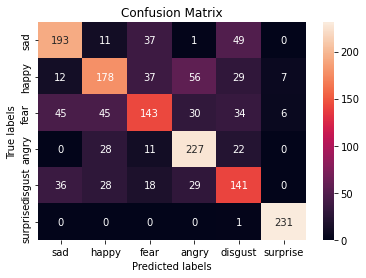

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ['sad','happy','fear','angry','disgust','surprise']
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
import wave
import contextlib

def get_longest_duration(folder_path):
  durations  = []

  for audio_path in os.listdir(folder_path):
    wav = folder_path+audio_path
    with contextlib.closing(wave.open(wav,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        durations.append(duration)

    return max(durations)

In [ ]:
TESS = "/content/toronto/TESS Toronto emotional speech set data/"
RAV = "/content/ravdess-emotional/ALL/"
SAVEE = "/content/surrey-audiovisual/ALL/"
CREMA = "/content/crema/AudioWAV/"

# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['JE_n09.wav', 'JE_su13.wav', 'JK_a06.wav', 'KL_su04.wav', 'JK_n28.wav']

In [ ]:
max_duration_TESS = get_longest_duration(TESS)
print('the max duration in TESS is:', max_duration_TESS)
max_duration_RAV = get_longest_duration(RAV)
print('the max duration in RAV is:', max_duration_RAV)
max_duration_SAVEE = get_longest_duration(SAVEE)
print('the max duration in SAVEE is:', max_duration_SAVEE)
max_duration_CREMA = get_longest_duration(CREMA)
print('the max duration in CREMA is:', max_duration_CREMA)

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ['sad','happy','fear','angry','neutral','disgust','surprise']
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

========================================================================

# --Useless 4th modeling

In [ ]:
#input_shape=(X_train.shape[1],1)
from keras.layers import Input
from keras.models import Model

input_main = Input(shape = X_train.shape[1])
x = Dense(128,activation = 'relu', kernel_regularizer = 'l2')(input_main)
x = Dense(128,activation = 'relu', kernel_regularizer = 'l2')(x)
x = Dense(64,activation = 'relu', kernel_regularizer = 'l2')(x)
x = Dense(64,activation = 'relu', kernel_regularizer = 'l2')(x)
x = Dense(64,activation = 'relu', kernel_regularizer = 'l2')(x)

predictions = Dense(6,activation = 'softmax')(x)

green_model = Model(inputs = [input_main],outputs = predictions)

green_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense_31 (Dense)            (None, 128)               3072      
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 6)                 390 

In [ ]:
green_model.compile(loss='categorical_crossentropy', optimizer='ADAM',metrics=['accuracy'])
model_history=green_model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 89/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1056 - accuracy: 0.5758 - val_loss: 1.1462 - val_accuracy: 0.5430

Epoch 90/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1216 - accuracy: 0.5698 - val_loss: 1.1329 - val_accuracy: 0.5543

Epoch 91/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1231 - accuracy: 0.5739 - val_loss: 1.1455 - val_accuracy: 0.5519

Epoch 92/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1241 - accuracy: 0.5678 - val_loss: 1.1879 - val_accuracy: 0.5282

Epoch 93/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1314 - accuracy: 0.5674 - val_loss: 1.1501 - val_accuracy: 0.5460

Epoch 94/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1234 - accuracy: 0.5657 - val_loss: 1.1350 - val_accuracy: 0.5567

Epoch 95/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1183 - accuracy: 0.5695 - val_loss: 1.1777 - val_accuracy: 0.5282

Epoch 96/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1141 - accuracy: 0.5720 - val_loss: 1.1616 - val_accuracy: 0.5478

Epoch 97/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1115 - accuracy: 0.5722 - val_loss: 1.2446 - val_accuracy: 0.5134

Epoch 98/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1157 - accuracy: 0.5731 - val_loss: 1.1976 - val_accuracy: 0.5294

Epoch 99/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1183 - accuracy: 0.5693 - val_loss: 1.1619 - val_accuracy: 0.5436

Epoch 100/100
597/597 [==============================] - 2s 3ms/step - loss: 1.1081 - accuracy: 0.5769 - val_loss: 1.2554 - val_accuracy: 0.4914

# Improvement by new data

In [ ]:
! pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.4 MB/s 


In [ ]:
import shutil
shutil.rmtree('/content/downloads')

### Imports

In [ ]:
import pathlib
import pandas as pd
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
import time
import pandas as pd
import patoolib
import librosa
import soundfile as sf
import os
import glob
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/ocr.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py \
                    -O /root/.ipython/ocr.py"
    run(split(shellCmd))
from ocr import runSh

### Data Preparation

In [ ]:
urls = ['https://www.openslr.org/resources/115/bea_Angry.tar.gz','https://www.openslr.org/resources/115/bea_Amused.tar.gz','https://www.openslr.org/resources/115/bea_Disgusted.tar.gz','https://www.openslr.org/resources/115/bea_Neutral.tar.gz',
 'https://www.openslr.org/resources/115/bea_Sleepy.tar.gz','https://www.openslr.org/resources/115/jenie_Amused.tar.gz','https://www.openslr.org/resources/115/jenie_Angry.tar.gz','https://www.openslr.org/resources/115/jenie_Disgusted.tar.gz',
 'https://www.openslr.org/resources/115/jenie_Neutral.tar.gz','https://www.openslr.org/resources/115/jenie_Sleepy.tar.gz','https://www.openslr.org/resources/115/josh_Amused.tar.gz','https://www.openslr.org/resources/115/josh_Neutral.tar.gz',
 'https://www.openslr.org/resources/115/josh_Sleepy.tar.gz','https://www.openslr.org/resources/115/sam_Amused.tar.gz','https://www.openslr.org/resources/115/sam_Angry.tar.gz','https://www.openslr.org/resources/115/sam_Disgusted.tar.gz',
 'https://www.openslr.org/resources/115/sam_Neutral.tar.gz','https://www.openslr.org/resources/115/sam_Sleepy.tar.gz']

In [ ]:
labels = []
audios_path = []

### Function of Calling & Rewriting and DF creation of each url

In [ ]:
def download_from_url(url):

  URL = url #@param {type:"string"}
  #@markdown <center><h5>Default output path: /content/downloads/</h5></center>
  #@markdown <center><h5>For Google Drive output path: /content/drive/My Drive/</h5></center>
  OUTPUT_PATH = "" #@param {type:"string"}


  if not path.exists("/root/.ipython/ocr.py"): 
      from subprocess import run
      from shlex import split

      shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                  "OneClickRun/master/res/ocr.py \
                      -O /root/.ipython/ocr.py"
      run(split(shellCmd))


  def youtubedlInstall():
    if not path.isfile("/usr/local/bin/youtube-dl"):
      cmdC = "rm -rf /content/sample_data/ && " \
              " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
              " apt-get install atomicparsley &&" \
              " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
              "-o /usr/local/bin/youtube-dl &&" \
              " chmod a+rx /usr/local/bin/youtube-dl"
      get_ipython().system_raw(cmdC)

  def aria2Install():
    runSh('apt install -y aria2')

  def istmd(URL): 
    link = urlparse(URL)
      
    #YandexDisk
    if link.netloc == "yadi.sk":
      API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                      '?public_key={}&path=/{}&offset={}'
      dry = False
      def md5sum(file_path):
          md5 = hashlib.md5()
          with open(file_path, 'rb') as f:
              for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                  md5.update(chunk)
          return md5.hexdigest()


      def check_and_download_file(target_path, url, size, checksum):
          if path.isfile(target_path):
              if size == path.getsize(target_path):
                  if checksum == md5sum(target_path):
                      print('URL {}'.format(url))
                      print('skipping correct {}'.format(target_path))
                      return
          if not dry:
              print('URL {}'.format(url))
              print('downloading {}'.format(target_path))
              runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
              # r = requests.get(url, stream=True)
              # with open(target_path, 'wb') as f:
              #     shutil.copyfileobj(r.raw, f)


      def download_path(target_path, public_key, source_path, offset=0):
          print('getting "{}" at offset {}'.format(source_path, offset))
          current_path = path.join(target_path, source_path)
          pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
          jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
          def try_as_file(j):
              if 'file' in j:
                  file_save_path = path.join(current_path, j['name'])
                  check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                  return True
              return False

          # first try to treat the actual json as a single file description
          if try_as_file(jsn):
              return

          # otherwise treat it as a directory
          emb = jsn['_embedded']
          items = emb['items']
          for i in items:
              # each item can be a file...
              if try_as_file(i):
                  continue
              # ... or a directory
              else:
                  subdir_path = path.join(source_path, i['name'])
                  download_path(target_path, public_key, subdir_path)

          # check if current directory has more items
          last = offset + emb['limit']
          if last < emb['total']:
              download_path(target_path, public_key, source_path, last)
      download_path(OUTPUT_PATH, URL, '')
      return False  
    return URL

  if not OUTPUT_PATH:
    OUTPUT_PATH = "/content/downloads/unpack/"
    
  if not URL == "":
    aria2Install()
    youtubedlInstall()
    try:
      os.chdir('/content')
      mkdir("downloads")
    except FileExistsError:
      pass
    os.chdir('/content/downloads/')

    try:
      mkdir("unpack")
    except FileExistsError:
      pass

    url = istmd(URL)
    if url != False:
      print('URL {}'.format(URL))
      cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
              '--external-downloader aria2c ' \
              '--external-downloader-args "-x 16 -s 16 -k 1M"'
      runSh(cmdC, output=True)
  else:
    print("Please input url")

  last_tar_file_name = URL.split('/')[-1].split('.gz')[0]

  print(last_tar_file_name)


  os.chdir('/content/downloads/')
  try:
      mkdir("extracted")
  except FileExistsError:
      pass

  mkdir(f'/content/downloads/extracted/{last_tar_file_name}')

  patoolib.extract_archive(f"/content/downloads/unpack/{last_tar_file_name}",outdir=f'/content/downloads/extracted/{last_tar_file_name}')

  # Construct old file name
  source = os.listdir(f'/content/downloads/extracted/{last_tar_file_name}')
  #labels = 
  print(source)

  

  # Renaming the file

  #Fixing the RIFF Bug
  for audio_name in source:
    destination = f'/content/downloads/extracted/{last_tar_file_name}/{audio_name}'
    audio , sample_rate = librosa.load(f'/content/downloads/extracted/{last_tar_file_name}/{audio_name}') 
    sf.write(destination, audio, sample_rate)
  
  global audios_path
  audios_path = [f'/content/downloads/extracted/{last_tar_file_name}/{audio_name}' for audio_name in source]
  global labels
  labels = [URL.split('/')[-1].split('.tar')[0].split('_')[-1].lower() for i in source]

  #df = pd.DataFrame(audios_path,labels )
  df_url = pd.DataFrame()
  df_url['path'] = audios_path
  df_url['labels'] = labels

  #df.columns =['labels', 'path']
  
  return df_url

### Concatenating all OpenSLR data

In [ ]:
counter = 0
df_SLR = pd.DataFrame()
for url in urls:
  df_each = download_from_url(url)
  #df.head()
  df_SLR = pd.concat([df_SLR, df_each],ignore_index = True, axis = 0)
  # if counter == 1:
  #   break
  # counter += 1

In [ ]:
df_SLR.head()

,path,labels
0,/content/downloads/extracted/bea_Angry.tar/ang...,angry
1,/content/downloads/extracted/bea_Angry.tar/ang...,angry
2,/content/downloads/extracted/bea_Angry.tar/ang...,angry
3,/content/downloads/extracted/bea_Angry.tar/ang...,angry
4,/content/downloads/extracted/bea_Angry.tar/ang...,angry


In [ ]:
df_SLR.tail()

,path,labels
6888,/content/downloads/extracted/sam_Sleepy.tar/sl...,sleepy
6889,/content/downloads/extracted/sam_Sleepy.tar/sl...,sleepy
6890,/content/downloads/extracted/sam_Sleepy.tar/sl...,sleepy
6891,/content/downloads/extracted/sam_Sleepy.tar/sl...,sleepy
6892,/content/downloads/extracted/sam_Sleepy.tar/sl...,sleepy


In [ ]:
# adding the source column to the df_SLR
df_SLR['source'] = ["SLR" for i in range(df_SLR.shape[0])]

### concat df (old) and df_SLR + renaming labels

In [ ]:
df.head()

,labels,source,path
0,angry,SAVEE,/content/surrey-audiovisual/ALL/JK_a02.wav
1,neutral,SAVEE,/content/surrey-audiovisual/ALL/JK_n23.wav
2,happy,SAVEE,/content/surrey-audiovisual/ALL/KL_h12.wav
3,fear,SAVEE,/content/surrey-audiovisual/ALL/JK_f02.wav
4,surprise,SAVEE,/content/surrey-audiovisual/ALL/JK_su06.wav


In [ ]:
df_total = pd.concat([df, df_SLR],ignore_index = True, axis = 0)

In [ ]:
df_total.head()

,labels,source,path
0,angry,SAVEE,/content/surrey-audiovisual/ALL/JK_a02.wav
1,neutral,SAVEE,/content/surrey-audiovisual/ALL/JK_n23.wav
2,happy,SAVEE,/content/surrey-audiovisual/ALL/KL_h12.wav
3,fear,SAVEE,/content/surrey-audiovisual/ALL/JK_f02.wav
4,surprise,SAVEE,/content/surrey-audiovisual/ALL/JK_su06.wav


In [ ]:
df_total.tail()

,labels,source,path
20002,sleepy,SLR,/content/downloads/extracted/sam_Sleepy.tar/sl...
20003,sleepy,SLR,/content/downloads/extracted/sam_Sleepy.tar/sl...
20004,sleepy,SLR,/content/downloads/extracted/sam_Sleepy.tar/sl...
20005,sleepy,SLR,/content/downloads/extracted/sam_Sleepy.tar/sl...
20006,sleepy,SLR,/content/downloads/extracted/sam_Sleepy.tar/sl...


In [ ]:
df_total['labels'].value_counts()

neutral      3451
angry        3183
happy        1915
fear         1915
sad          1915
surprise     1840
disgust      1731
sleepy       1721
amused       1317
disgusted    1019
Name: labels, dtype: int64

In [ ]:
df_total.loc[df_total['labels'] == "disgust",'labels'] = 'disgusted'

In [ ]:
df_total['labels'].value_counts()

neutral      3451
angry        3183
disgusted    2750
happy        1915
fear         1915
sad          1915
surprise     1840
sleepy       1721
amused       1317
Name: labels, dtype: int64

In [ ]:
df_total.loc[df_total['labels'] == "amused",'labels'] = 'happy'

In [ ]:
df_total['labels'].value_counts()

neutral      3451
happy        3232
angry        3183
disgusted    2750
fear         1915
sad          1915
surprise     1840
sleepy       1721
Name: labels, dtype: int64

In [ ]:
df_total.loc[df_total['labels'] == "sad",'labels'] = 'sleepy'

In [ ]:
df_total['labels'].value_counts()

sleepy       3636
neutral      3451
happy        3232
angry        3183
disgusted    2750
fear         1915
surprise     1840
Name: labels, dtype: int64

### feature extraction of df_total

In [ ]:
from librosa.feature.spectral import spectral_centroid
# Another feature extraction 
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import soundfile as sf

##Return audio features 
def feature_extraction_2(file_name):
    #X, sample_rate = sf.read(file_name, dtype='float32')
    #print("feature_extraction")
    
    X , sample_rate = librosa.load(file_name, sr=None) #Can also load file using librosa
    if X.ndim > 1:
        X = X[:,0]
    X = X.T
    
    ## stFourier Transform
    stft = np.abs(librosa.stft(X))
            
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=18).T, axis=0) #Returns N_mel coefs
    #print("mfcc: ",mfccs)
    rmse = np.mean(librosa.feature.rms(y=X).T, axis=0) #RMS Energy for each Frame (Stanford's). Returns 1 value 
    #print("rmse: ",rmse)
    spectral_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate).T, axis=0) #Spectral Flux (Stanford's). Returns 1 Value
    #print("spectral_flux: ",spectral_flux)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0) #Returns 1 value
    #print("zcr:",zcr)

    bw = np.mean(librosa.feature.spectral_bandwidth(y=X, sr=sample_rate).T, axis=0) #Returns 1 value
    #print("bw:",bw)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T, axis=0) #Returns 1 value
    #print("spectral_centroid:",spectral_centroid)

    ##Return computed audio features
    return mfccs, rmse, spectral_flux, spectral_centroid, zcr, bw

In [ ]:
x = []
features = []
for counter,audio_path in enumerate(df_total['path']):
  mfccs, rmse, spectral_flux, spectral_centroid, zcr, bw  = feature_extraction_2(audio_path)
  
  features = np.hstack([mfccs, rmse, spectral_flux, spectral_centroid, zcr, bw])
  #shape = 23,
  x.append(features)
  
  #shape = 1,23
  
x = np.array(x)
x = np.expand_dims(x, axis=2)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


In [ ]:
x.shape

(20007, 23, 1)

In [ ]:
temp_x = x
temp_x = temp_x[:,:,0]
print(temp_x.shape)
temp_x[0]

(20007, 23)


array([-3.07724243e+02,  1.15947868e+02,  7.55408430e+00,  1.40175886e+01,
        2.22403107e+01, -2.69528413e+00, -1.00553036e+01,  5.56322753e-01,
        4.88026953e+00, -4.60015965e+00, -6.63757896e+00,  1.85048282e+00,
       -8.58534932e-01, -3.72245860e+00, -1.13732405e-01, -1.11513281e+00,
       -1.79471648e+00,  3.36288601e-01,  1.50345132e-01,  1.32732320e+00,
        9.55235369e+02,  2.02024430e-02,  1.33301785e+03])

In [ ]:
df_total['labels'].value_counts()

sleepy       3636
neutral      3451
happy        3232
angry        3183
disgusted    2750
fear         1915
surprise     1840
Name: labels, dtype: int64

In [ ]:
import tensorflow as tf
mappings = {'sleepy':0,
            'neutral':1,
            'happy' :2,
            'angry':3,
            'disgusted':4,
            'fear':5,
            'surprise':6
            }
y = df_total['labels'].apply(lambda x: mappings[x])
number_of_classes = 7
y_codded = tf.keras.utils.to_categorical(y, num_classes= number_of_classes)

In [ ]:
y_codded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#useless df only to save the arrays of extracted features in a df then in a csv file to save time in case session ended

column_names = ["input", "output"]

df_features_from_total = pd.DataFrame(index=range(temp_x.shape[0]), columns = column_names)
df_features_from_total.tail()


for i in range(temp_x.shape[0]):
  # print(i)
  # print(temp_x[i])
  df_features_from_total['input'][i] = temp_x[i]

for i in range(temp_x.shape[0]):
  # print(i)
  # print(temp_x[i])
  df_features_from_total['output'][i] = y_codded[i]
df_features_from_total = df_features_from_total.join( df['path'] )

df_features_from_total.to_csv('/content/features_from_total.csv')


In [ ]:
df_features_from_total.head()

,input,output,path
0,"[-307.7242431640625, 115.94786834716797, 7.554...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",/content/surrey-audiovisual/ALL/JK_a02.wav
1,"[-407.6293029785156, 117.38509368896484, 24.34...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",/content/surrey-audiovisual/ALL/JK_n23.wav
2,"[-610.3466796875, 124.94605255126953, 23.50545...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",/content/surrey-audiovisual/ALL/KL_h12.wav
3,"[-291.04327392578125, 117.17218780517578, -0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",/content/surrey-audiovisual/ALL/JK_f02.wav
4,"[-296.91717529296875, 98.9014892578125, -1.421...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",/content/surrey-audiovisual/ALL/JK_su06.wav


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_codded, test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42)

In [ ]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv1D(128, 8, padding='same',input_shape=(23,1)))  # X_train.shape[1] = No. of Columns
# model.add(Conv1D(128, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns

model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
#opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           1152      
                                                                 
 activation (Activation)     (None, 23, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 128)           131200    
                                                                 
 batch_normalization (BatchN  (None, 23, 128)          512       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 23, 128)           0         
                                                                 
 dropout (Dropout)           (None, 23, 128)           0         
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='ADAM',metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
938/938 [==============================] - 22s 21ms/step - loss: 1.5888 - accuracy: 0.3386 - val_loss: 1.4200 - val_accuracy: 0.4124
Epoch 2/100
938/938 [==============================] - 20s 21ms/step - loss: 1.2614 - accuracy: 0.4910 - val_loss: 1.1833 - val_accuracy: 0.5150
Epoch 3/100
938/938 [==============================] - 20s 21ms/step - loss: 1.1264 - accuracy: 0.5467 - val_loss: 1.0854 - val_accuracy: 0.5658
Epoch 4/100
938/938 [==============================] - 21s 23ms/step - loss: 1.0423 - accuracy: 0.5855 - val_loss: 1.0867 - val_accuracy: 0.5712
Epoch 5/100
938/938 [==============================] - 20s 21ms/step - loss: 0.9928 - accuracy: 0.5983 - val_loss: 0.9205 - val_accuracy: 0.6435
Epoch 6/100
938/938 [==============================] - 20s 21ms/step - loss: 0.9436 - accuracy: 0.6238 - val_loss: 0.8574 - val_accuracy: 0.6571
Epoch 7/100
938/938 [==============================] - 20s 21ms/step - loss: 0.9227 - accuracy: 0.6307 - val_loss: 0.9261 - val_ac

In [ ]:
y_pred = model.predict(X_test)

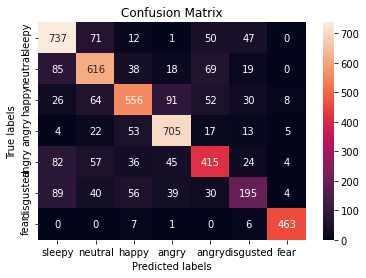

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ['sleepy','neutral','happy','angry','disgusted','fear', 'surprise']
 
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
# from tensorflow import keras
model2.save('/content/model_total_2.h5')
#model = keras.models.load_model('path/to/location')

===================================================================================

# Deployment Needs

In [ ]:
!pip install youtube_dl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.1 MB/s 


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#called later
from __future__ import unicode_literals
import youtube_dl
def audio_extraction(url):
  os.chdir('/content')
  ydl_opts = {
      'format': 'bestaudio/best',
      'postprocessors': [{
          'key': 'FFmpegExtractAudio',
          'preferredcodec': 'wav',
          'preferredquality': '192',
      }],
  }
  with youtube_dl.YoutubeDL(ydl_opts) as ydl:
      info_dict = ydl.extract_info(url, download=False)
      name = ydl.prepare_filename(info_dict)
      duration = info_dict['duration']
      ydl.download([url])
  name = name.split('.webm')
  name = name[0]
  name = name.split('.m4a')

  audio = '/content/'+name[0]+'.wav'
  return audio,duration

In [ ]:
#called later
from pydub import AudioSegment
import shutil
def sub_audios_creation(audio_path, dur_cut, actual_dur, folder_name= "/content/testing"):
  try:
    shutil.rmtree(folder_name)
  except:
    x = 0
  os.mkdir(folder_name)
  count = 0
  max = dur_cut*1000
  while(count*dur_cut < actual_dur): #5*counter < 
    newAudio = AudioSegment.from_wav(audio_path)
    newAudio = newAudio[count*max:(count+1)*max]
    newAudio.export(f'{folder_name}/new{count}.wav', format="wav")
    count +=1

  return folder_name

In [ ]:
#sub_audios_creation('/content/Tuverl Smart Commuting _ Seedstars IRP supported by UK Charity and Shell Foundation-5_e7sw9-ng4.wav',1,5)

In [ ]:
#called later         feature extraction from new audio
def return_Input(mfccs, rmse, spectral_flux, spectral_centroid, zcr, bw):
  extracted_features = np.hstack([mfccs, rmse, spectral_flux, spectral_centroid, zcr, bw])
  #print(extracted_features.shape)
  features = np.expand_dims(extracted_features, axis=1)
  #print(x.shape)
  features = np.expand_dims(features, axis=0)
  #print(x.shape)
  return features

In [ ]:
def Predict_sketch(sketch_path):
  mfccs, rmse, spectral_flux, spectral_centroid, zcr, bw = feature_extraction_2(sketch_path)
  input_features = return_Input(mfccs, rmse, spectral_flux, spectral_centroid, zcr, bw)
  pred = model.predict(input_features)
  return np.argmax(pred)

In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def Predict(url,model,cutdur,folder_path="/content/testing"):
  sketches_predictions = []
  audio,duration = audio_extraction(url)
  print("duration = ",duration)

  sketches_path = sub_audios_creation(audio,cutdur,duration,folder_path)

  for sketch_path in os.listdir(sketches_path):
    sketches_predictions.append(Predict_sketch(folder_path+'/'+sketch_path))

  #defined_list = [0,1,2]
  #curr_frequency = [sketches_predictions.count(i) for i in defined_list] #[100,20,30]
  print(sketches_predictions)

  matching = {0: 0 , 1: 0 , 2: 0 , 3: 0 , 4: 0 , 5: 0 , 6: 0 }

  for i in sketches_predictions:
    matching[i] = matching[i]+1
  perc_list = [ matching[i]/len(sketches_predictions)*100 for i in range(6)]
  print(f'sleepy {perc_list[0]}% ------- neutral {perc_list[1]}% -------- happy {perc_list[2]}% ----- angry {perc_list[3]}% --- disgusted {perc_list[4]}%---- fear {perc_list[5]}% ---- surprise {perc_list[6]}%')


  return perc_list
  #return sum(sketches_predictions)/len(sketches_predictions)

In [ ]:
Predict('https://www.youtube.com/watch?v=fFXSaaBS2kM&ab_channel=RedFrostMotivation' , model ,5 )

[youtube] fFXSaaBS2kM: Downloading webpage
[youtube] fFXSaaBS2kM: Downloading webpage
[download] Destination: Sad Poems for Sorrowful Times-fFXSaaBS2kM.webm
[download] 100% of 9.79MiB in 03:39
[ffmpeg] Destination: Sad Poems for Sorrowful Times-fFXSaaBS2kM.wav
Deleting original file Sad Poems for Sorrowful Times-fFXSaaBS2kM.webm (pass -k to keep)
duration =  630
[0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 5, 5, 5, 5, 1, 0, 0, 0, 5, 0, 5, 1, 5, 0, 0, 1, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 1, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 5, 0, 0, 5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 5, 5, 0, 5, 0, 0, 5, 0, 5]
sleepy 61.904761904761905% neutral 11.904761904761903% happy 0.0% angry 0.0% disgusted 0.0% fear 26.190476190476193% surprise


[61.904761904761905, 11.904761904761903, 0.0, 0.0, 0.0, 26.190476190476193]

In [ ]:
labels = ['sleepy','neutral','happy','angry','disgusted','fear', 'surprise']

In [ ]:
testing_pred = [0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 5, 5, 5, 5, 1, 0, 0, 0, 5, 0, 5, 1, 5, 0, 0, 1, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 1, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 5, 0, 0, 5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 5, 5, 0, 5, 0, 0, 5, 0, 5]
labels = ['sleepy','neutral','happy','angry','disgusted','fear', 'surprise']

matching = {0: 0 , 1: 0 , 2: 0 , 3: 0 , 4: 0 , 5: 0 , 6: 0 }

for i in testing_pred:
  matching[i] = matching[i]+1

perc_list = [ matching[i]/len(testing_pred)*100 for i in range(6)]
perc_list
print(f'sleepy {perc_list[0]}% neutral {perc_list[1]}% happy {perc_list[2]}% angry {perc_list[3]}% disgusted {perc_list[4]}% fear {perc_list[5]}% surprise')

sleepy 61.904761904761905% neutral 11.904761904761903% happy 0.0% angry 0.0% disgusted 0.0% fear 26.190476190476193% surprise
